### Pangeo: Near Surface Temperature Anomaly Animation

**Packages:**

- matplotlib
- numpy
- pandas 
    - *tool for reading data*, *data analysis and manipulation*
- xarray 
    - *for handling of multidimensional arrays*
- zarr 
    - *format for the storage of chunked, compressed, multidimensional arrays*
- fsspec 
    - *for accessing data from Google Cloud Storage*
-   gcsfs
    - *for accessing to Google Storage*
- xesmf 
    - *for regridding geospatial data* (doesn't seem to work on windows)
- cartopy 
    - *for processing geospatial data and creating maps*

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec
import xesmf as xe

In [3]:
#reading CSV file with pandas
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [4]:
#if you want precipitation change this to 'pr'
variable = 'tas'
scenario = 'ssp585'

In [5]:
#filtering data by variable (monthly near surface temperature)
df_var = df.query(f"table_id == 'Amon' & variable_id == '{variable}'")
df_var

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
24,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
45,HighResMIP,MOHC,HadGEM3-GC31-MM,highresSST-present,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...,NaN,20170818
82,HighResMIP,MOHC,HadGEM3-GC31-HM,highresSST-present,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...,NaN,20170831
126,HighResMIP,MOHC,HadGEM3-GC31-LM,highresSST-present,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...,NaN,20170906
187,HighResMIP,ECMWF,ECMWF-IFS-HR,control-1950,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/HighResMIP/ECMWF/ECMWF-IFS-HR...,NaN,20170915
...,...,...,...,...,...,...,...,...,...,...,...
523651,ScenarioMIP,MIROC,MIROC6,ssp245,r29i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp2...,NaN,20210917
523701,CMIP,MOHC,HadGEM3-GC31-LL,piControl,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/piC...,NaN,20211103
523712,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108
523721,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211109


In [6]:
#filtering by expreriment and member id
df_exp = df_var[(df_var["experiment_id"].isin(['historical', scenario])) & (df_var["member_id"]=='r1i1p1f1')]
df_exp

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
29231,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
32351,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
...,...,...,...,...,...,...,...,...,...,...,...
515778,ScenarioMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCE...,NaN,20210317
517658,ScenarioMIP,CSIRO,ACCESS-ESM1-5,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1...,NaN,20210318
521076,CMIP,KIOST,KIOST-ESM,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/KIOST/KIOST-ESM/historic...,NaN,20210601
521172,ScenarioMIP,KIOST,KIOST-ESM,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/s...,NaN,20210601


In [7]:
#choosing 20 models (also used in IPCC's map)
df_model = df_exp[(df_exp["source_id"].isin(['AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CANESM5', 'CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR','CNRM-ESM2-1', 'EC-EARTH3', 'EC-EARTH3-Veg', 'FGOALS-g3','GFDL-CM4', 'GFDL-ESM4', 'HADGEM3-GC31-LL', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'KACE-1-0-G', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']))]
df_model

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
43297,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181126
44593,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,NaN,20181212
55765,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20190222
56326,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314
204046,ScenarioMIP,AWI,AWI-CM-1-1-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/AWI/AWI-CM-1-1-MR...,NaN,20190529
204283,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190530


In [8]:
#list of models
model = df_model.source_id
model_count = len(model)
print(model_count)

40


In [9]:
#Different models have different grids which is why the data needs first to be interpolated to same grid to be able to calculate mean values of multiple models.

#creating 1x1 grid
grid_1x1 = xr.Dataset()
grid_1x1['lon'] = xr.DataArray(data=0.5 + np.arange(360), dims=('lon'))
grid_1x1['lat'] = xr.DataArray(data= 0.5 -90 + np.arange(180), dims=('lat'))
grid_1x1['lon_b'] = xr.DataArray(data=np.arange(361), dims=('xp'))
grid_1x1['lat_b'] = xr.DataArray(data=-90 + np.arange(181), dims=('yp'))
grid_1x1

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180, xp: 361, yp: 181)
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: xp, yp
Data variables:
    lon_b    (xp) int64 0 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
    lat_b    (yp) int64 -90 -89 -88 -87 -86 -85 -84 -83 ... 84 85 86 87 88 89 90

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
tas_regridded = []

for i in range(model_count):
    zstore = df_model.zstore.values[i]
    print(zstore)

    #mapping-style interface to the store
    mapper = fsspec.get_mapper(zstore)

    #opening dataset with xarray and zarr
    ds = xr.open_zarr(mapper, consolidated=True)

    #regridding data with conservative method to 1x1 grid
    regrid_to_1x1 = xe.Regridder(ds, grid_1x1, 'conservative', periodic=True)
    dr_out = regrid_to_1x1(ds[variable])

    #saving regridded tas-data as annual means 
    tas_regridded.append(dr_out.groupby('time.year').mean(dim='time'))

gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/tas/gr1/v20180701/
gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/tas/gr1/v20180701/
gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/tas/gr1/v20180701/
gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/tas/gn/v20181126/
gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/Amon/tas/gn/v20181212/
gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r1i1p1f1/Amon/tas/gn/v20190222/
gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/historical/r1i1p1f1/Amon/tas/gn/v20190227/
gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/tas/gn/v20190314/
gs://cmip6/CMIP6/ScenarioMIP/AWI/AWI-CM-1-1-MR/ssp585/r1i1p1f1/Amon/tas/gn/v20190529/
gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical/r1i1p1f1/Amon/tas/gr1/v20190530/
gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp585/r1i1p1f1/Amon/tas/gr1/v20190603/
gs://cmip6/CMIP6/CMIP/INM/INM-CM5-0/historical/r1i1p1f1/Amon/tas/gr1/v20190610/
gs:/

In [12]:
#concats the moldels and then calculates mean temperature over all of the models
tas_mean = xr.concat(tas_regridded, pd.Index(model, name="source_id"), coords='minimal').mean('source_id')
tas_mean

<xarray.DataArray (year: 251, lat: 180, lon: 360)>
dask.array<mean_agg-aggregate, shape=(251, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    height   float64 2.0

In [13]:
#load is one of dask commands that executes the computations and loads data into memory          
#this might take a while but it does make plotting and animating significantly faster
from dask.diagnostics import ProgressBar

with ProgressBar():
    tas_mean = tas_mean.load()

[########################################] | 100% Completed | 516.69 s


In [14]:
#Mean temperature of 1850-1900 (from all the models)
tas_rel = tas_mean.sel(year = slice('1850','1900')).mean('year')

In [15]:
#packages used in plotting
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean #this is just for nice looking colorpalette, (you can also just use one of the colormaps from matplotlib)

In [16]:
##if you want to change the variable you can also change the colormap to something that fits better
colormap = cmocean.cm.balance #(or for example cmap = "coolwarm", "bwr" or "RdBu_r")
units = ds[variable].units

#temperature change is same in kelvins and celcisus degrees
if units=='K':
    units = '$ ^\circ$C'

colormap = cmocean.cm.balance #(or for example cmap = "coolwarm", "bwr" or "RdBu_r")
max = 4

1850
1850
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047


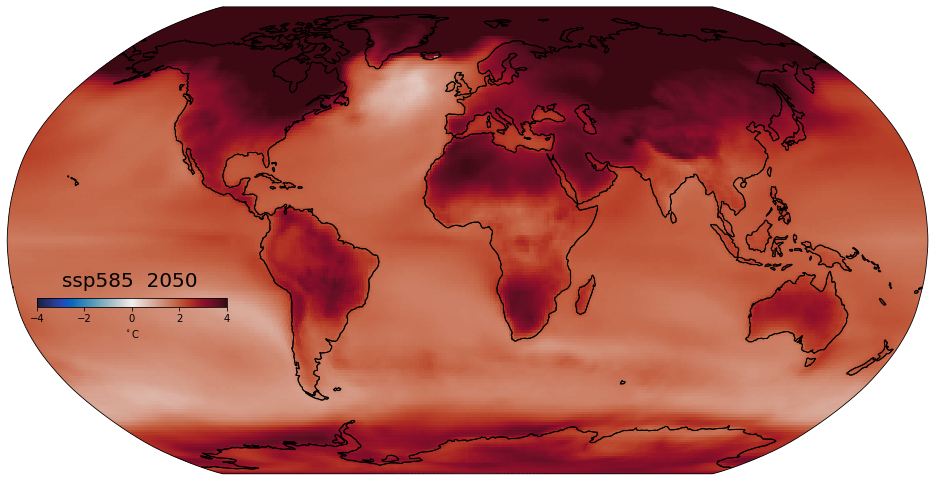

In [17]:
#creating a global map with coastlines which stays the same during the whole animation
fig = plt.figure(figsize=(16.5,12.75))
ax=plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

#calculating tas-anomalies and determining longnitudes and latitudes
data = tas_mean-tas_rel
lons = grid_1x1.lon
lats = grid_1x1.lat

#creating the mesh and text, that will be updated for each frame
mesh = ax.pcolormesh(lons, lats, data[0], animated = True, transform = ccrs.PlateCarree(), cmap=colormap,  vmin=-max, vmax=max)
text = ax.text(0.06, 0.40, '', transform=ax.transAxes, size = 20)

#placing colorbar over the map
cbaxes = fig.add_axes([0.15, 0.43, 0.16, 0.01])# placement (x,y), size of the bar (x,y)
cbar = fig.colorbar(mesh,cax=cbaxes,orientation='horizontal', label = units)

ax.coastlines()

def update(t):
    year = 1850+t
    print(year)
    mesh.set_array(data[t].values.ravel())
    if year < 2015:
        text.set_text(f'Historical {year}')
    else:
        text.set_text(f'{scenario}  {year}')
    return (mesh,text,)

#number of years we want to animate
n = 201
ts = [i for i in range(n)]
#Adding few more frames to show the end situataion
ts = ts + 15*[n-1]

#animating 201 (+15) frames with 200 milliseconds between each frame
ani = FuncAnimation(fig, update, frames=ts, init_func=None, blit=True, interval=200, repeat=False)

ani.save(f"{variable}-anomaly-video.mp4", dpi=300)